In [54]:
import pandas as pd

# read dataset
data = pd.read_csv("challenge.txt", sep='\t', header=None)

rows, cols = data.shape
print(f"Dimensions: {rows} rows × {cols} columns")

missing = data.isnull().sum().sum()

if missing > 0:
    print("There are missing values")
else:
    print("No missing values")

Dimensions: 1000 rows × 10 columns
No missing values


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(data)
print("Number of components to preserve 99% variance:", pca.n_components_)


pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(data)
print("Number of components to preserve 99% variance:", pca.n_components_)


Number of components to preserve 99% variance: 2
Number of components to preserve 99% variance: 3


Explained variance ratio: [0.7260413  0.26185646]
Total variance retained: 0.987897760061818


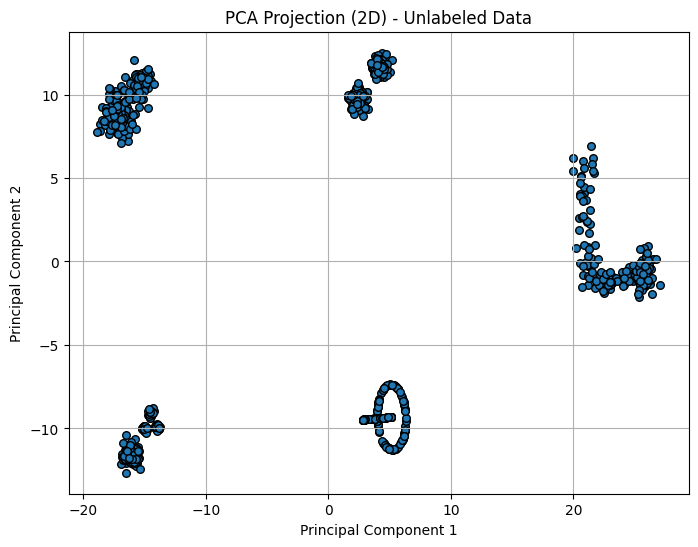

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.values)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30, edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D) - Unlabeled Data")
plt.grid(True)
plt.show()

Explained variance ratio: [0.7260413  0.26185646 0.00736647]
Total variance retained: 0.9952642306308093


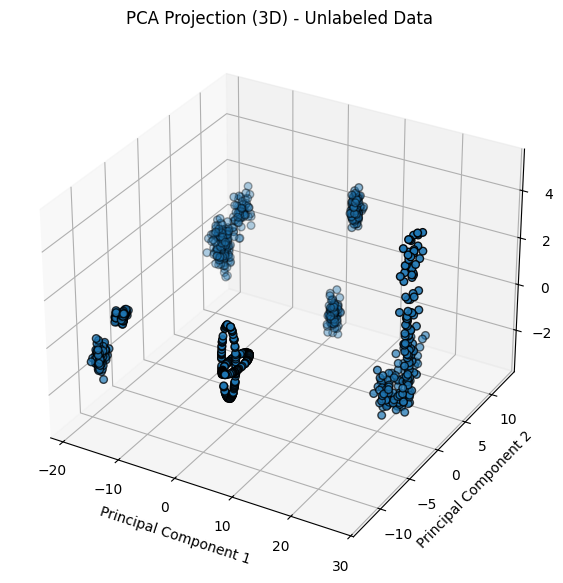

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_pca = pca.fit_transform(data.values)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=30, edgecolor='k')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Projection (3D) - Unlabeled Data')
plt.show()

In [55]:
summary = pd.DataFrame({
    'Mean': data.mean(),
    'Median': data.median(),
    'Std Dev': data.std()
})

print(summary)

           Mean     Median    Std Dev
0  9.600000e+00   7.299342   9.072724
1  1.600000e+01  19.141101  15.027236
2  7.105427e-17   0.161230   1.262376
3  7.105427e-17   0.000000   0.997996
4  5.684342e-17   0.000000   0.446317
5 -8.526513e-17   0.000000   0.446317
6 -2.842171e-17   0.000000   0.446317
7  4.973799e-17   0.000000   0.446317
8  7.105427e-17   0.000000   0.446317
9  3.552714e-17   0.000000   0.446317
